In [28]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import json
from tqdm import tqdm
import os

import datetime
import arrow
import time

# Load data

See the scraping notebook for data but sales come from https://kittysales.herokuapp.com, genetics come from data on the etherium contract

In [58]:
sales_data_file = '.cache/sales.json'
sales = json.load(open(sales_data_file))
len(sales)
sales['sales'][0]

{'blockNumber': 4688676,
 'blocktimeStamp': 1512617298,
 'id': 'log_9357a0df',
 'rank': 1,
 'returnValues': {'0': '18',
  '1': '253336776620370370370',
  '2': '0xA6d3fdf423BbC578dd4d41220078475371626B22'},
 'soldPrice': 115197.04572803818}

In [129]:
# convert to dataframe
df = pd.DataFrame(sales['sales'])

# convert to pandas timestamp
datetimes = df['blocktimeStamp'].apply(datetime.datetime.fromtimestamp)
df['date'] = pd.to_datetime(datetimes)

# grab some of the fields under return values for the dataframe
df2=pd.DataFrame.from_records(df['returnValues'].values)
df2.columns=['kitty_id','price_18eth','address']
df2['price_eth']=df2['price_18eth'].apply(lambda x:float(x)*1e-18)
df2['kitty_id'] = pd.to_numeric(df2['kitty_id'])
for col in ['kitty_id','price_eth']:
    df[col] = df2[col]
    
# rename cols
df['soldPrice'] = df['soldPrice'].rename('soldPrice_USD')
df = df.rename(columns={"soldPrice":"sold_price_usd"})
df.index = df['kitty_id']

# drop uneeded columns
df = df.drop(['id', 'blockNumber', 'rank', 'returnValues', 'blocktimeStamp'], axis=1)
df_sales = df
df_sales

,sold_price_usd,date,kitty_id,price_eth
kitty_id,,,,
18,1.151970e+05,2017-12-07 11:28:18,18,2.533368e+02
4,1.123156e+05,2017-12-07 03:41:57,4,2.470000e+02
1,1.144816e+05,2017-12-03 04:32:36,1,2.469255e+02
21,1.080061e+05,2017-12-08 17:31:03,21,2.375228e+02
22,1.023118e+05,2017-12-08 17:34:36,22,2.250000e+02
5,1.016005e+05,2017-12-06 00:45:01,5,2.220000e+02
7,8.767734e+04,2017-12-05 03:45:47,7,1.900468e+02
35,8.500053e+04,2017-12-06 15:18:02,35,1.888897e+02
87,8.142809e+04,2017-12-07 02:11:42,87,1.790734e+02


In [7]:
# haven't finished scraping
# api_data_file = '.cache/api_data.json'
# api_data = json.load(open(api_data_file))
# len(api_data)

10024

In [109]:
genetics_file = '.cache/genes.json'
genetics = json.load(open(genetics_file))
len(genetics)

43488

In [496]:
# convert to dataframe
df = pd.DataFrame.from_dict(genetics).T
df.columns=['is_gestating', 'is_ready', 'cooldown_index', 'next_action_at', 'siring_with_id', 'birth_time', 'matron_id', 'sire_id', 'generation', 'genes']
df.index = pd.to_numeric(df.index)
df['generation'] = pd.to_numeric(df['generation'])
df['matron_id'] = pd.to_numeric(df['matron_id'])
df['sire_id'] = pd.to_numeric(df['sire_id'])
df['birth_time'] = pd.to_numeric(df['birth_time'])
df = df.sort_index()
df = df.drop(['is_gestating', 'is_ready', 'cooldown_index', 'next_action_at', 'siring_with_id'], axis=1)
df = df[df.genes!='0'] # remove rows with no genes
df = df[1:] # remove origin kitty
df_genetics = df
df_genetics

,birth_time,matron_id,sire_id,generation,genes
1,1511417999,0,0,0,6268376211548016160889809226598771686091543863...
2,1511417999,0,0,0,6233328247424174420738016520205540105237269755...
3,1511417999,0,0,0,5163523354162354170567022901547386224918079227...
4,1511417999,0,0,0,6268375141947334719316716288420757560178523965...
5,1511417999,0,0,0,6233328806923846998926376260807366625937483650...
6,1511417999,0,0,0,4613035485150908523120757036068930199538348135...
7,1511417999,0,0,0,6233277698034429017103950567765524970954426879...
8,1511418008,0,0,0,4559620020693848583707206074171681675830775819...
9,1511418035,0,0,0,6233833779874278041852346338088492342734244547...
10,1511418044,0,0,0,5163523337171367126011753839819537067276020035...


# Collect training data

In [518]:
def genestr_to_bits(x):
    """Gene data is a uint256 string, but I think the genes are it's bytes so lets convert to a byte array"""
    bits = bin(int(x))[2:]
    bitarray = [1 if b=='1' else 0 for b in bits]
    bitarray = (256-len(bitarray))*[0] + bitarray # pad
    return bitarray

In [519]:
lens = np.array([len(b) for b in df_genetics.genes.apply(lambda x:bin(int(x)))])
np.unique(lens)
(lens==242).sum()

335

In [520]:
pad = 256-lens

In [521]:
# merge and add parent genes
df = pd.merge(df_genetics, df_sales, how='inner', left_index=True, right_index=True)
df

# remove rows where we don't have the parent genetics
mask1 = df['sire_id'].apply(lambda x:int(x) in df_genetics.index)
mask2 = df['matron_id'].apply(lambda x:int(x) in df_genetics.index)
df = df[mask1*mask2]

# remove generation 0
df = df[df['generation']>0]
len(df)

df['sire_genes']=df['sire_id'].apply(lambda x:df_genetics.loc[x].genes).apply(genestr_to_bits)
df['matron_genes']=df['matron_id'].apply(lambda x:df_genetics.loc[x].genes).apply(genestr_to_bits)
df['genes']=df['genes'].apply(genestr_to_bits)

df

/home/wassname/.pyenv/versions/3.5.3/envs/jupyter3/lib/python3.5/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


,birth_time,matron_id,sire_id,generation,genes,sold_price_usd,date,kitty_id,price_eth,sire_genes,matron_genes
3005,1511466911,1045,1003,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",75.475318,2017-12-02 05:08:56,3005,0.160056,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3007,1511466918,1044,1006,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",101.317700,2017-12-03 00:22:07,3007,0.220000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3008,1511466918,1097,1099,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.555534,2017-11-24 08:25:32,3008,0.013552,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3010,1511467040,1041,1058,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",23.645100,2017-11-29 07:17:53,3010,0.050000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3010,1511467040,1041,1058,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.974763,2017-11-30 06:41:14,3010,0.022729,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3010,1511467040,1041,1058,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.200592,2017-11-24 04:15:04,3010,0.009996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3011,1511467040,1093,1099,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.281243,2017-11-24 06:00:39,3011,0.014819,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3012,1511467189,1046,1087,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",478.842000,2017-12-04 00:15:11,3012,1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3012,1511467189,1046,1087,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",399.712992,2017-12-05 09:53:38,3012,0.856569,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3012,1511467189,1046,1087,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.096416,2017-11-24 10:23:41,3012,0.009984,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [528]:
# parent genes
X = np.array([df['sire_genes'], df['matron_genes']])
X = np.transpose(X, (1,2,0))

# child genes
Y = np.stack(df['genes'].values)
X.shape, Y.shape

((27727, 256, 2), (27727, 256))

In [529]:
a=df['sire_genes']
min([len(b) for b in a])

256

In [530]:
# split into test and train, val (& shuffle)
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, random_state=42, test_size=0.1)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train,Y_train, random_state=42, test_size=0.1)
X_train.shape, y_train.shape

((24954, 256, 2), (24954, 256))

In [581]:
# Check for overlap between y and y_train
overlap = np.array([((y - y_train)==0).all(-1).sum()>0 in y_train for y in y_test])
overlap.sum()/len(y_test)

KeyboardInterrupt: 

In [585]:
# # NOTE: there is ~50% overlap between test and train :( because of repeated breeding
# # For now I'll just leave it and try to get an accuracy higher than the overlap

# # check for overlap
# overlaps = []
# for y in tqdm(y_test[:1000]):
#     overlaps.append(((y - y_train)==0).all(-1).sum()>0)
# overlaps = np.array(overlaps)
# print('overlap fraction', overlaps.sum()/len(overlaps))

100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]


# Train

In [531]:
import keras

In [543]:
# Simple model with two layers
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((256,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='elu'))
model.add(keras.layers.Dense(256, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        (None, 256, 2)            0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
Total params: 197,120
Trainable params: 197,120
Non-trainable params: 0
_________________________________________________________________


In [544]:
history = model.fit(X_train,y_train, epochs=100)

Epoch 1/100
24954/24954 [==============================] - 5s - loss: 508.7665 - acc: 0.0907     
Epoch 2/100
24954/24954 [==============================] - 4s - loss: 503.2542 - acc: 0.0828     
Epoch 3/100
24954/24954 [==============================] - 4s - loss: 502.2601 - acc: 0.0971     
Epoch 4/100
24954/24954 [==============================] - 4s - loss: 501.8326 - acc: 0.0468     
Epoch 5/100
24954/24954 [==============================] - 4s - loss: 501.5762 - acc: 0.0706     
Epoch 6/100
24954/24954 [==============================] - 4s - loss: 501.3692 - acc: 0.1013     
Epoch 7/100
24954/24954 [==============================] - 4s - loss: 501.2114 - acc: 0.1160     
Epoch 8/100
24954/24954 [==============================] - 4s - loss: 501.0631 - acc: 0.1080     
Epoch 9/100
24954/24954 [==============================] - 4s - loss: 500.9294 - acc: 0.1333     
Epoch 10/100
24954/24954 [==============================] - 5s - loss: 500.8025 - acc: 0.1472     
Epoch 11/100
24954/

24954/24954 [==============================] - 5s - loss: 496.7922 - acc: 0.8149     
Epoch 84/100
24954/24954 [==============================] - 4s - loss: 496.7672 - acc: 0.8147     
Epoch 85/100
24954/24954 [==============================] - 4s - loss: 496.7608 - acc: 0.8108     
Epoch 86/100
24954/24954 [==============================] - 4s - loss: 496.7526 - acc: 0.8283     
Epoch 87/100
24954/24954 [==============================] - 4s - loss: 496.7163 - acc: 0.8276     
Epoch 88/100
24954/24954 [==============================] - 4s - loss: 496.7204 - acc: 0.8274     
Epoch 89/100
24954/24954 [==============================] - 4s - loss: 496.6877 - acc: 0.8336     
Epoch 90/100
24954/24954 [==============================] - 4s - loss: 496.6718 - acc: 0.8333     
Epoch 91/100
24954/24954 [==============================] - 4s - loss: 496.6418 - acc: 0.8322     
Epoch 92/100
24954/24954 [==============================] - 4s - loss: 496.6560 - acc: 0.8411     
Epoch 93/100
24954/2495

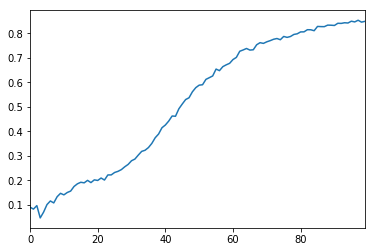

In [549]:
pd.DataFrame(history.history)['acc'].plot()

In [552]:
metrics = model.evaluate(X_test,y_test)
metrics = dict(zip(model.metrics_names, metrics))
metrics

2656/2773 [===========================>..] - ETA: 0s

{'acc': 0.8968626036998214, 'loss': 505.5500093082465}